In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
np.set_printoptions(precision=6)

#### Numpy Arrays for the Data

In [2]:
# Laser light travel distance (in meters)
distance1 = np.array([3.125,4.804,6.487,8.162])
# Phase shift (in radians)
phase_shift1 = np.array([6.552,10.065,13.573,17.114])
# Phase shift uncertainty (in radians)
phase_shift_err1 = np.array([0.007,0.0062,0.0077,0.0048])


# Laser light travel distance (in meters)
distance2 = np.array([3.000,4.580,6.169,7.762])
# Phase shift (in radians)
phase_shift2 = np.array([8.2803,11.582,14.881,18.244])
# Phase shift uncertainty (in radians)
phase_shift_err2 = np.array([0.0010 ,0.0012 ,0.0011 ,0.0014])

##### Define fit function

In [3]:
def StraightLine(x, m, c):
    y = m * x + c
    return y

##### Perform fit

In [4]:
line, cov = curve_fit(StraightLine, distance2, phase_shift2, sigma=phase_shift_err2, absolute_sigma=True)

##### Extract fit parameters and compute chi-squared

In [5]:
m = line[0]
c = line[1]
error_m = np.sqrt(cov[0,0])
error_c = np.sqrt(cov[1,1])
# Compute chi-squared
phase_shift_fit = StraightLine(distance2, *line)
chisq = ((phase_shift2-phase_shift_fit)/phase_shift_err2)**2
print(f'Chi-squared: {chisq.sum():.2f},  Number of degrees of freedom: {len(phase_shift2)-2}')
print(f'Reduced chi-squared: {chisq.sum()/(len(phase_shift2)-2):.3f}')

Chi-squared: 420.48,  Number of degrees of freedom: 2
Reduced chi-squared: 210.239


In [6]:
print(f'The slope is {m:.5f} +/- {error_m:.5f} 1/m')
print(f'The intercept is {c:.4f} +/- {error_c:.4f} rad')
print(f'The value of f/v is {m/2/np.pi:.5f} +/- {error_m/2/np.pi:.5f} 1/m')

The slope is 2.08939 +/- 0.00033 1/m
The intercept is 2.0090 +/- 0.0018 rad
The value of f/v is 0.33254 +/- 0.00005 1/m


#### Plot the data and fit results

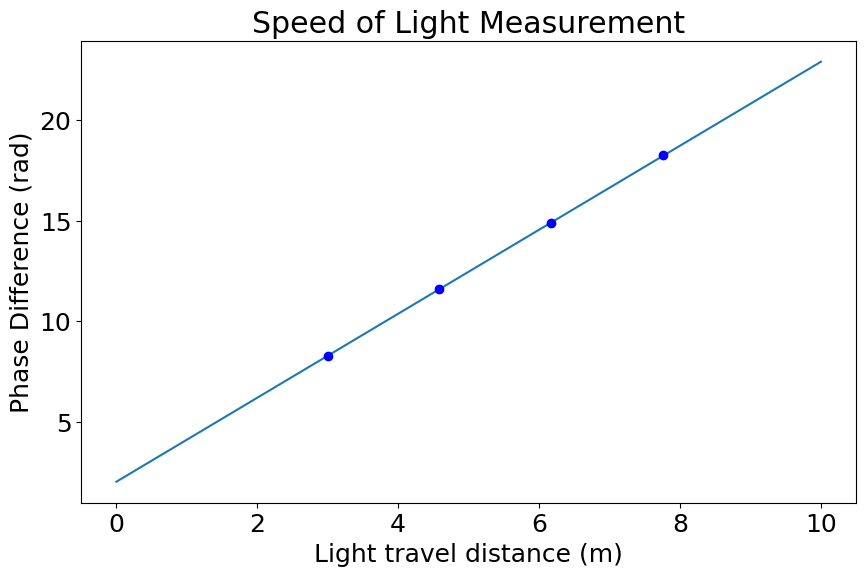

In [7]:
xstart = 0
xstop = 10

plt.figure(figsize=(10, 6))
plt.rc('font', size=18)

# Plot the data
plt.errorbar(distance2, phase_shift2, yerr=phase_shift_err2, fmt='bo')

# Compute best-fit values
xvalues = np.linspace(xstart, xstop, 100)
yvalues_fit = StraightLine(xvalues, *line)

# Plot the fit results
plt.plot(xvalues, yvalues_fit)

# Add title and axis labels
plt.title('Speed of Light Measurement')
plt.xlabel('Light travel distance (m)')
plt.ylabel('Phase Difference (rad)')

plt.show()

#### Compute and plot fit residuals

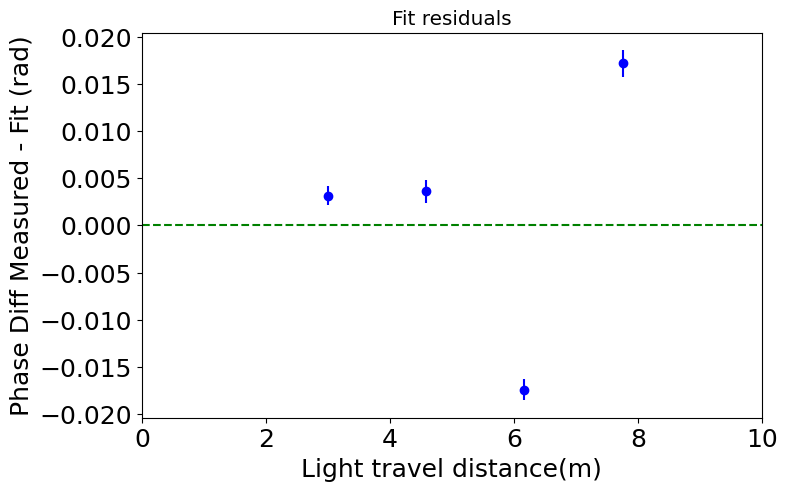

In [8]:
# Compute residuals, i.e. difference between the measured lengths and the best-fit lengths
phase_shift_res = phase_shift2 - phase_shift_fit

# Plot the residuals
plt.figure(figsize=(8, 5))
plt.xlim(xstart, xstop)
plt.errorbar(distance2, phase_shift_res, yerr=phase_shift_err2, fmt='bo')
plt.rc('font', size=12)
plt.title('Fit residuals')
plt.xlabel('Light travel distance(m)')
plt.ylabel('Phase Diff Measured - Fit (rad)')
plt.axhline(y=0.0, color='g', linestyle='--')
plt.show()

### Now compute the straight line fit with polyfit using just the central values of the y coordinate

You should derive the slope and intercept with uncertainties. Compare the results obtained with polyfit to those obtained with curve_fit as done above.